In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [5]:
#for me to keep track of how many classification articles I currently have
#to be removed later
df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
len(df_true)

27

In [6]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            if option not in method_dic: #checks if it is a different answer
                method_dic['Other'] = method_dic.get('Other')+1
                break #ensures that even if the other answer has a , in it, it is only counted once
            else: 
                method_dic[option] = method_dic.get(option)+1
    return method_dic

In [7]:
word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'Other']


In [8]:
perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'Other']


In [169]:
def create_viz(df, word_list, column, plot_option, name, count_option, stacked_option):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    if count_option == 'multiple choice':
        data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}
        df = pd.DataFrame.from_dict(data)

    elif count_option == 'y/n':
        data = {'2012': count_yes_no(df_2012, column),
       '2021': count_yes_no(df_2021, column)}
        
        df = pd.DataFrame.from_dict(data)
        if name == 'Dataset type':
            row_names = {0:"Public", 1:"Private", 2:"Don't know"}
        else: row_names = {0:"Yes", 1:"No", 2:"Don't know"}
        
        df.rename(index= row_names, inplace=True)
  
   
        
    color_dic = {'2012': '#066570', '2021': '#5eb1bf'}
    
    if 'used' in name:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_xlabel('number of articles')
        plt.xticks(rotation = 0)
    else:
        fig = df.plot(kind = plot_option, title = name, stacked = stacked_option, color =color_dic)
        fig.set_ylabel('number of articles')
        plt.xticks(rotation = 45)
        
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')

    
    plt.savefig(name , bbox_inches='tight')
    
    
    return df


In [10]:
ethics_columns = [25, 27, 29, 31]

In [13]:
def count_yes_no(df, column):
    #creating a list of number of yes, no and don't know answers for a certain column in a df
    answer_list = [0,0,0] #[yes, no, don't know] [public, private, don't know]
    for input in df[df.columns[column]]:
        if input == 'Yes' or input == 'Public':
            answer_list[0] += 1
        elif input == 'No' or input == 'Private':
            answer_list[1] += 1
        else:
            answer_list[2] += 1
    return answer_list

In [166]:
def create_ethics_viz(df, columns, plot_option, name, year):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    if year == 2012:
        df = df_true[df_true['Which year is the article from?'] == 2012]
    else:
        df = df_true[df_true['Which year is the article from?'] == 2021]
    
       
    #counting the answers
    data = {column:[] for column in columns}
    for column in columns:
        data[column] = count_yes_no(df, column)
    df = pd.DataFrame(data) 
    
    #renaming columns and rows

    column_names = {columns[0]:'Respect for persons', columns[1]:'Benefience', columns[2]:'Justice', columns[3]:'Repect for law/public interest'}
  
    row_names = {0:"Yes", 1:"No", 2:"Don't know"}

    df.rename(index= row_names, columns = column_names, inplace=True)
    
    color_dic = {'Yes': '#066570', 'No': '#5eb1bf', "Don't know": 'grey'}
   

    fig = df.transpose().plot(kind = plot_option, title = name, stacked = True, color = color_dic)
    for container in fig.containers:
        fig.bar_label(container, label_type='center', color = 'white')
    fig.set_xlabel("number of articles")
    fig.legend( loc='lower center', ncol=3)
    plt.savefig(name , bbox_inches='tight')



    return df

,2012,2021
Yes,8,3
No,8,8
Don't know,0,0


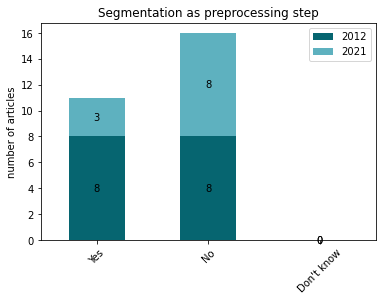

In [159]:
create_viz(df, [], 10, 'bar', 'Segmentation as preprocessing step', 'y/n', True)

,2012,2021
Public,4,7
Private,11,2
Don't know,1,2


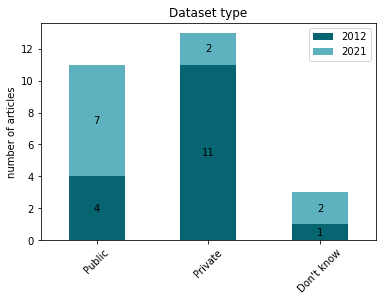

In [160]:
create_viz(df, [], 15, 'bar', 'Dataset type', 'y/n', True)

,2012,2021
Yes,9,8
No,7,3
Don't know,0,0


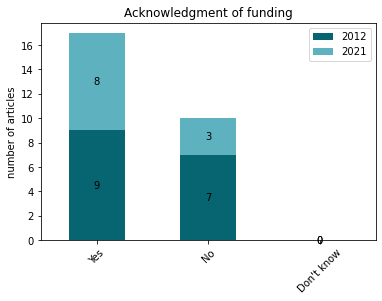

In [161]:
create_viz(df, [], 23, 'bar', 'Acknowledgment of funding', 'y/n', True)

,2012,2021
SVM,7,0
Graph analysis,2,2
Supervised learning,0,1
Unsupervised learning,1,1
Transfer learning,0,1
Neural network,0,7
Other,10,4


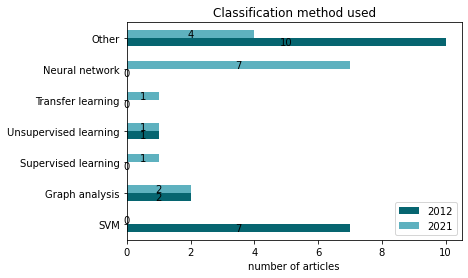

In [162]:
create_viz(df, word_list, 8, 'barh', 'Classification method used', 'multiple choice', False)

,2012,2021
AUC,4,5
Specificity,4,4
Accuracy,10,7
Recall,0,0
F1 score,0,3
Sensitivity,5,5
Other,9,4


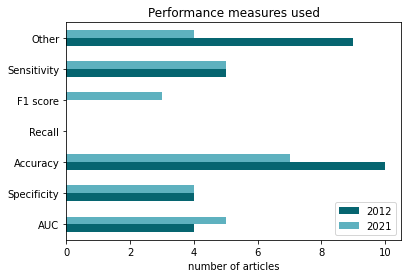

In [151]:
create_viz(df, perf_list, 9,'barh', 'Performance measures used', 'multiple choice', False)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,0,0,0,3
No,16,16,16,12
Don't know,0,0,0,1


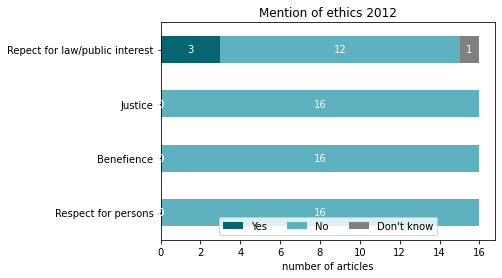

In [167]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2012', 2012)

,Respect for persons,Benefience,Justice,Repect for law/public interest
Yes,0,2,0,9
No,11,9,11,2
Don't know,0,0,0,0


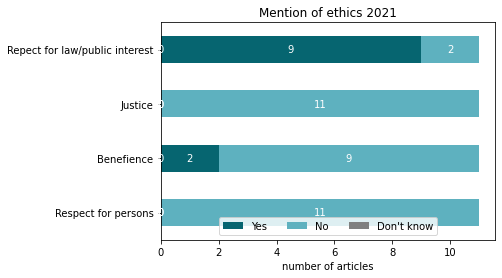

In [168]:
create_ethics_viz(df, ethics_columns, 'barh', 'Mention of ethics 2021', 2021)